## Load Libraries

In [17]:
library(readr) # CSV file I/O, e.g. the read_csv function
library(ggplot2) # Data visualization
library(plyr)
library(dplyr) 
library(treemap)

## Loading my datasets
The original dataset I worked with is NFLArrests which I found on Kaggle. However, I saw an opportunity to complement it with a dataset (Players_2016) which contains all active players in 2016.

In [18]:
#Loading my datasets
NFLArrests <- read_csv("C:/Users/Antonio/Desktop/Data Science Portfolio/NFL Arrests/ArrestIncidents.csv")
Players_2016 <- read_csv("C:/Users/Antonio/Desktop/Data Science Portfolio/NFL Arrests/np.csv")

Parsed with column specification:
cols(
  DATE = col_character(),
  TEAM = col_character(),
  NAME = col_character(),
  POSITION = col_character(),
  CASE = col_character(),
  CATEGORY = col_character(),
  DESCRIPTION = col_character(),
  OUTCOME = col_character()
)
Parsed with column specification:
cols(
  Player = col_character(),
  Pos = col_character(),
  Team = col_character(),
  College = col_character()
)


## Separate the Date into Year, Month, and Day 
I wanted to see year-by-year comparisson of NFL arrests, and I had to do this to extract the year. I also was interested in seeing if there is a particular month where NFL players get arrested more often. 

In [19]:
NFLArrests$Date = as.Date(NFLArrests$DATE, "%m/%d/%Y")

# Extract the Year, Month and Day from the Date
NFLArrests$Year = as.integer(format(NFLArrests$Date, "%Y"))
NFLArrests$Month = as.integer(format(NFLArrests$Date, "%m"))
NFLArrests$Day = as.integer(format(NFLArrests$Date, "%d"))

print(NFLArrests)

# A tibble: 850 x 12
        DATE  TEAM              NAME POSITION     CASE              CATEGORY
       <chr> <chr>             <chr>    <chr>    <chr>                 <chr>
 1 3/27/2017   SEA    Trevone Boykin       QB Arrested                 Drugs
 2 3/26/2017   CHI     Deiondre Hall       CB Arrested    Disorderly conduct
 3 3/26/2017    GB Makinton Dorleant       CB Arrested   Police interference
 4  3/7/2017    KC  Demetrius Harris       TE Arrested                 Drugs
 5  3/5/2017   LAR  Ethan Westbrooks       DT Arrested     Domestic violence
 6 2/25/2017   IND       David Parry       DT Arrested DUI, resisting arrest
 7 2/25/2017   BAL         Matt Elam        S Arrested                 Drugs
 8 2/16/2017   NYJ    Darrelle Revis       CB  Charged               Assault
 9 2/16/2017   LAC       King Dunlap       OT Arrested Violating court order
10 1/12/2017    GB       Sam Shields       CB  Charged                 Drugs
# ... with 840 more rows, and 6 more variables: DESCRIP

## Visualizing Arrests by Year
Look at the graph below and you can see that NFL arrests have been going down steadily since 2013. The data for 2017 is not complete yet since the season is not over, but I hope that it can stay lower than previous years. 

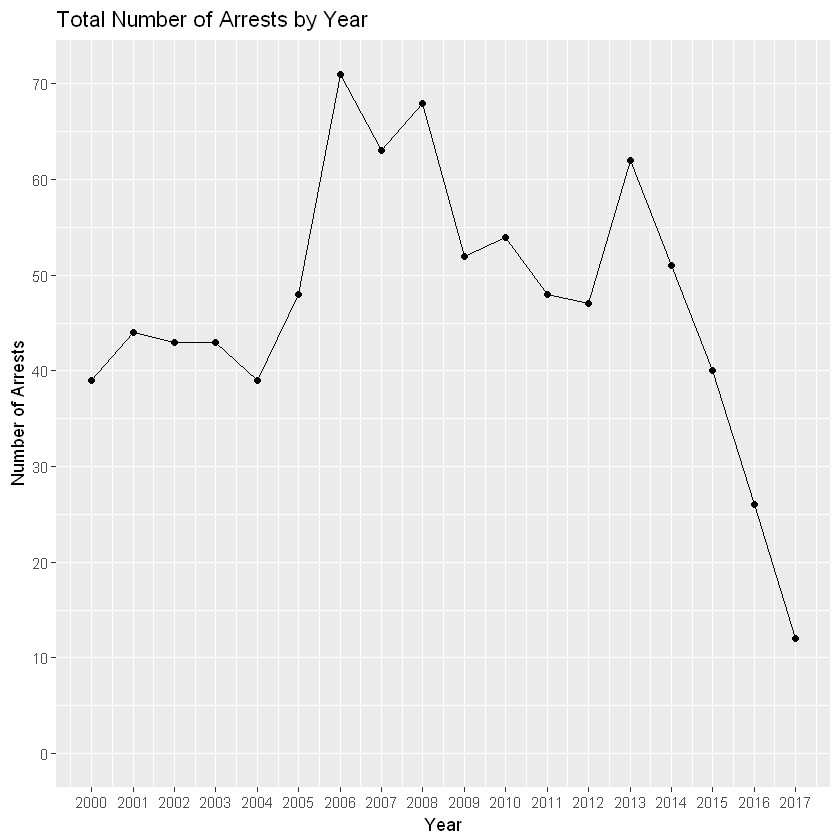

In [20]:
#Visualizing Arrests by Year

#Get Min and Max year for the X-Axis lower and upper limit
min_year = min(NFLArrests$Year,NFLArrests$Year)
max_year = max(NFLArrests$Year,NFLArrests$Year)

#Visualize Arrests by Year
ArrestsByYear <- count(NFLArrests, Year)
max_y_end = max(ArrestsByYear$n)

AY <- ggplot(ArrestsByYear, aes(x= Year, y = n)) + 
      geom_line() + 
      geom_point() + 
      xlab("Year") + 
      ylab("Number of Arrests") + 
      scale_x_continuous(limits = c(min_year, max_year), breaks = seq(min_year, max_year,1)) +
      scale_y_continuous(limits = c(0,max_y_end), breaks = seq(0,max_y_end,10)) +
      ggtitle("Total Number of Arrests by Year") 

print(AY)

## Visualizing Arrests by Month


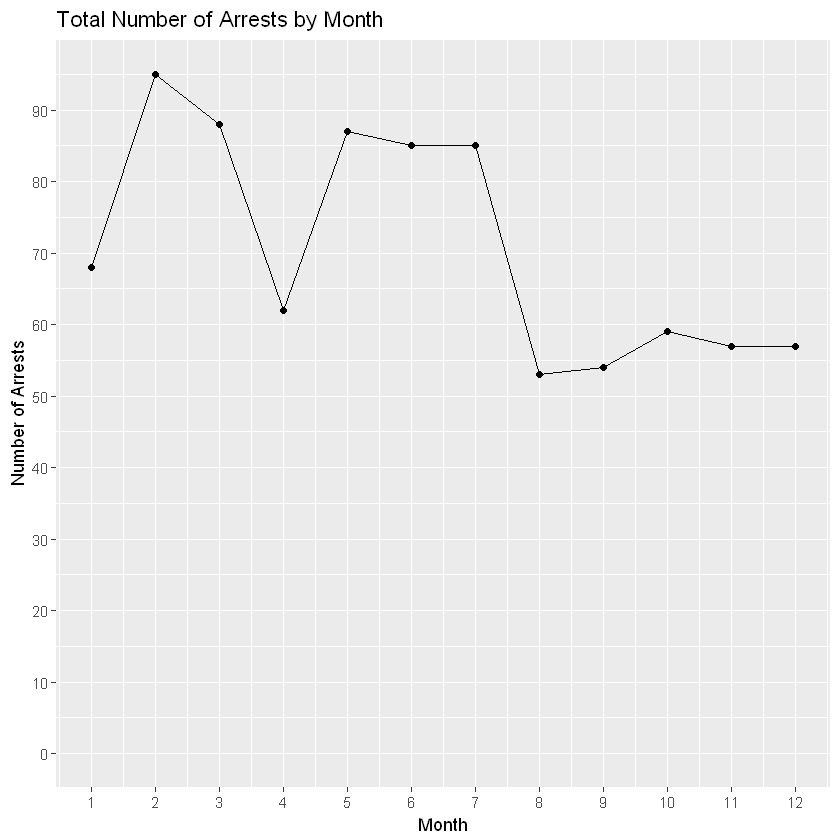

In [21]:
#Visualizing Arrests by Month

min_month = min(NFLArrests$Month,NFLArrests$Month)
max_month = max(NFLArrests$Month,NFLArrests$Month)

ArrestsByMonth <- count(NFLArrests,Month)
max_y_end = max(ArrestsByMonth$n)

AM <- ggplot(ArrestsByMonth, aes(x= Month, y =n)) + 
      geom_line() + 
      geom_point() + 
      xlab("Month") + 
      ylab("Number of Arrests") + 
      scale_x_continuous(limits = c(min_month, max_month), breaks = seq(min_month, max_month, 1)) +
      scale_y_continuous(limits = c(0,max_y_end), breaks = seq(0,max_y_end,10)) +
      ggtitle("Total Number of Arrests by Month") 
      
print(AM)

I was interested how a particular time of the year would affects NFL Arrests. The NFL season ends in January for teams that don't go to the playoffs, and by February the season ends for everyone. If you look at the graph below that is when NFL players get arrested the most. March-July that same trends continues, and this is when NFL players are free and have more time to get themselves in trouble. The interesting exception is April, and a possible explenation could be that April is when clubs with returning head coaches may begin offseason workout programs, so the players are busy. The numbers are low from August- December, as this is during pre-season and regular season.

NFL players need to find other ways to stay busy and stay out of trouble

## ArrestsbyTeam


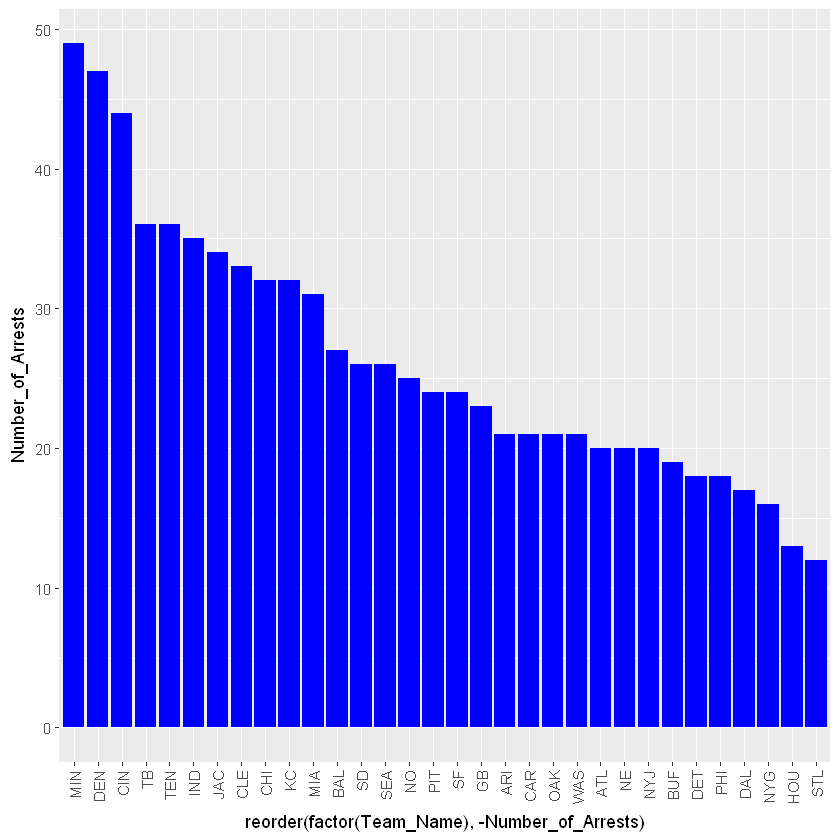

In [33]:
#ArrestsbyTeam

ArrestsbyTeam <- as.data.frame(table(NFLArrests$TEAM))
ArrestsbyTeamDesc <- head(arrange(ArrestsbyTeam,desc(Freq)), n = 32)
colnames(ArrestsbyTeamDesc) <- c("Team_Name", "Number_of_Arrests")                               
ggplot(ArrestsbyTeamDesc, aes(x = reorder(factor(Team_Name), -Number_of_Arrests), y = Number_of_Arrests)) +
  geom_bar(stat = "identity", fill = "blue") +  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5))

I also examined arrests by team, which you can see below. Out of the top 10 teams that have had NFL players arrested, only Denver and Indianapolis have won a Superbowl, and that is a team that had Peyton Manning, an exceptional leader and a once in a generation quarterback.

I always say it, arrested players will not win you championships. Sign players that lead by example.

## Arrests by Position



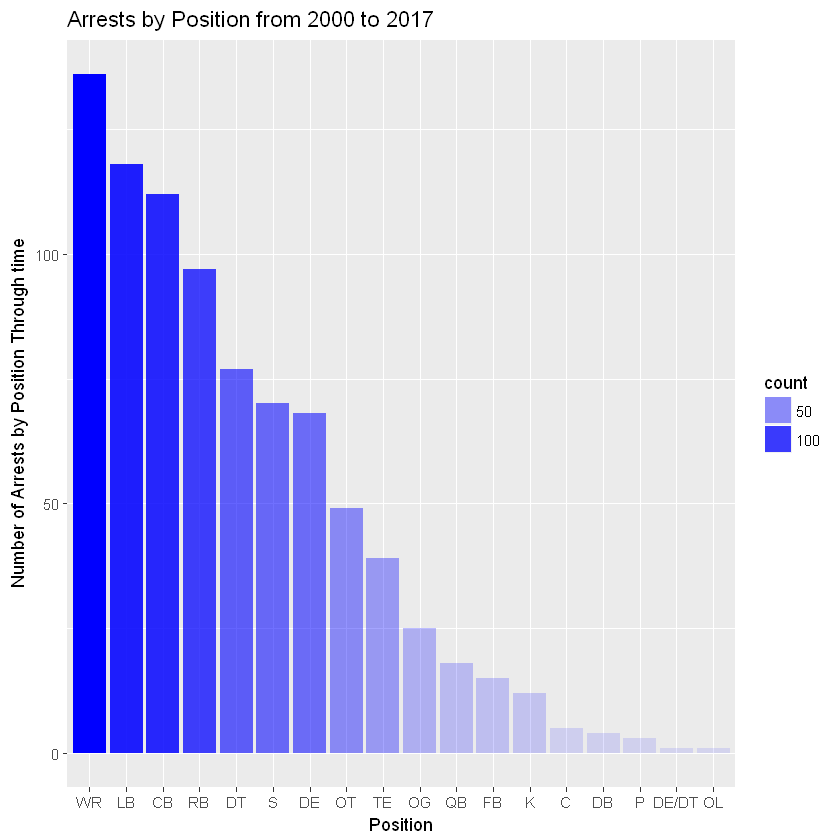

In [22]:
ArrestsbyPosition = group_by(NFLArrests, POSITION) %>%
   summarise(count=n())
   ggplot(ArrestsbyPosition, aes(x=reorder(factor(POSITION),-count), y=count, alpha=count)) + 
   geom_bar(stat = "identity", fill="blue") + 
   xlab("Position") + 
   ylab("Number of Arrests by Position Through time") + 
   ggtitle("Arrests by Position from 2000 to 2017") 

## Ratio of Arrested Players
The above graph shows that Wide Receivers have been arrested the most since 2000. However, it came to me that the most players in the NFL are Wide Receivers, as each team has at least 5 WR compared to 2-3 QB's on the roster. 

I brought in Players_2016 database in order to count how many players are total in each position, and I will calculate out of all wide receivers, how many get arrested. I will do that for all positions in order to see which position has the highest rate of arrests.

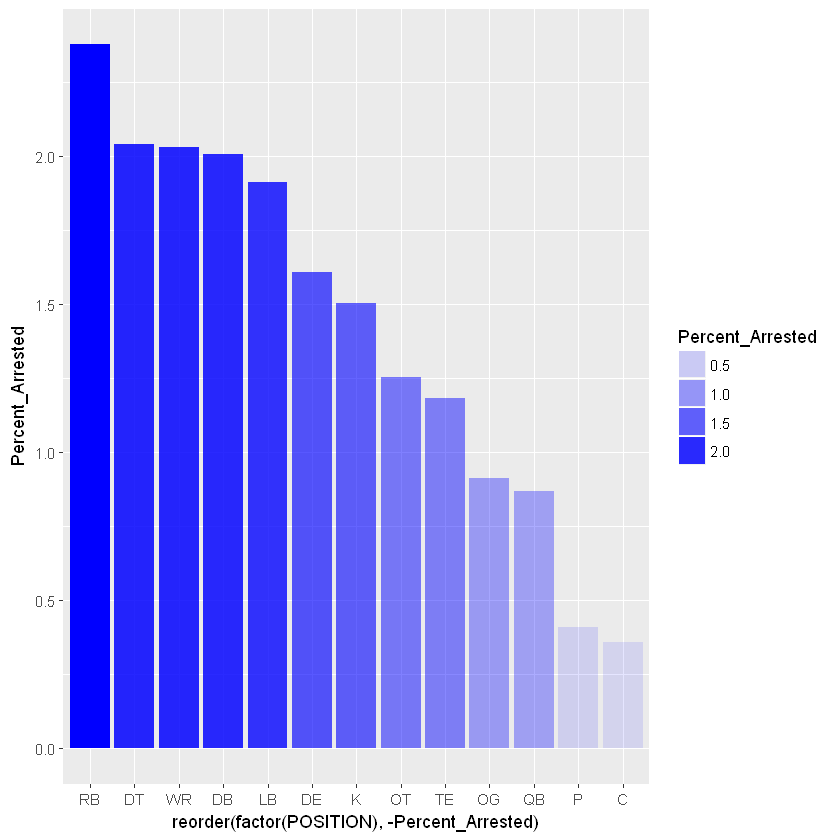

In [24]:
#Count how many players in each position
Player_Count_2016 <- as.data.frame(table(Players_2016$Pos))
colnames(Player_Count_2016) <- c("POSITION", "Number_of_Players")                               

#I manually created the positio DB due to the fact that some players were being counted as Cornerbacks, others as Defensivebacks, and I consider them both the same thing.
ArrestsbyPosition <- rbind(ArrestsbyPosition, data.frame(POSITION ="DB", count="190")) 
ArrestsbyPosition <- ArrestsbyPosition[-c(2,3, 16), ]

#Merge ArrestsbyPosition and Player_Count_2016

RatioArrestsbyPosition <- merge(ArrestsbyPosition, Player_Count_2016, by = "POSITION")
colnames(RatioArrestsbyPosition)[2] = "Number_of_Arrests"

#Calculate and graph the ratio of players arrested for the position compared to the total amount of players.
RatioArrestsbyPosition <- transform(RatioArrestsbyPosition, Number_of_Arrests = as.numeric(Number_of_Arrests),
                                        Number_of_Players = as.numeric(Number_of_Players))
RatioArrestsbyPosition <- transform(RatioArrestsbyPosition, Percent_Arrested = (Number_of_Arrests/17) / Number_of_Players *100)
ggplot(RatioArrestsbyPosition, aes(x = reorder(factor(POSITION), -Percent_Arrested), y = Percent_Arrested, alpha = Percent_Arrested)) +
  geom_bar(stat = "identity", fill = "blue") 

This table can give us more accurate information, and it shows that Running backs actually get arrested at the highest rate (Around 2.3 arrests for every 100 Runningbacks). Defensive Tackles get arrested at the 2nd highest rate, followed by Wide Receivers at 3rd. This graph could be used by coaches and scounts when deciding to draft and sign players. 

The good news that came out of this is that players don't really get arrested that much. 2 arrests out of a 100 players is a very small number. I was surprised by that because if you follow the media, they make it like the NFL is full of criminals.

## What is the most common reason for arrest?
DUI is the most common reason for NFL Arrests

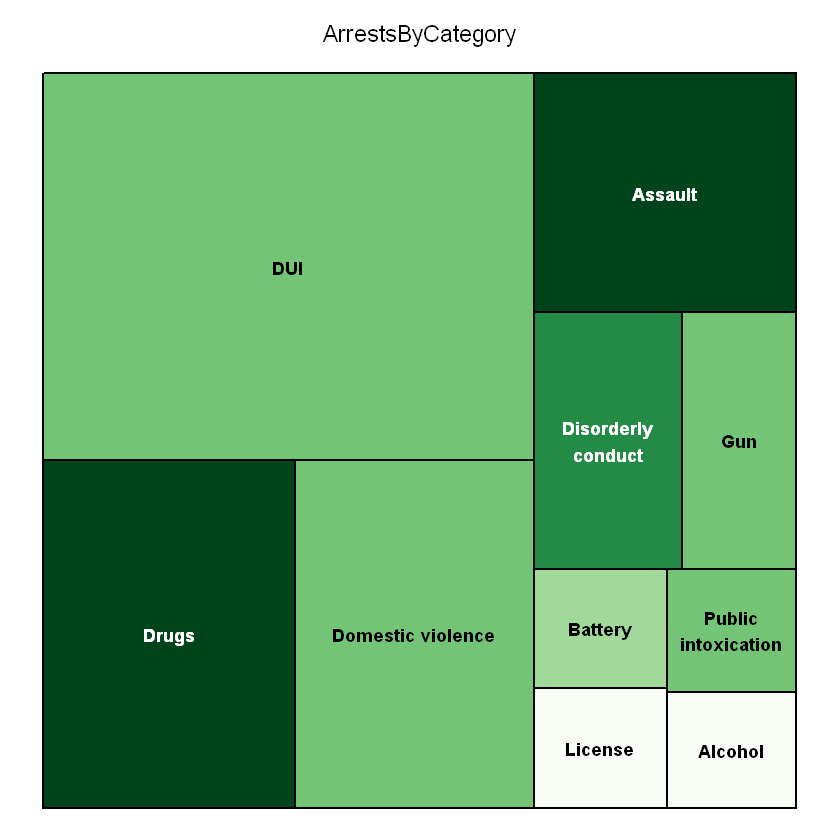

In [34]:
#Create table that counts arrests by category

ArrestCategory <- as.data.frame(table(NFLArrests$CATEGORY))
ArrestsCategory2 <- head(arrange(ArrestCategory,desc(Freq)), n = 10)
colnames(ArrestsCategory2) <- c("Category", "Frequency")  

#Create a treemap visualization

treemap(ArrestsCategory2, #Your data frame object
        index= "Category", #A list of your categorical variables
        vSize = "Frequency",  #This is your quantitative variable
        type="index", #Type sets the organization and color scheme of your treemap
        palette = "Greens",  #Select your color palette from the RColorBrewer presets or make your own.
        title="ArrestsByCategory", #Customize your title
        fontsize.title = 14 #Change the font size of the title
)




## Arrests by Player

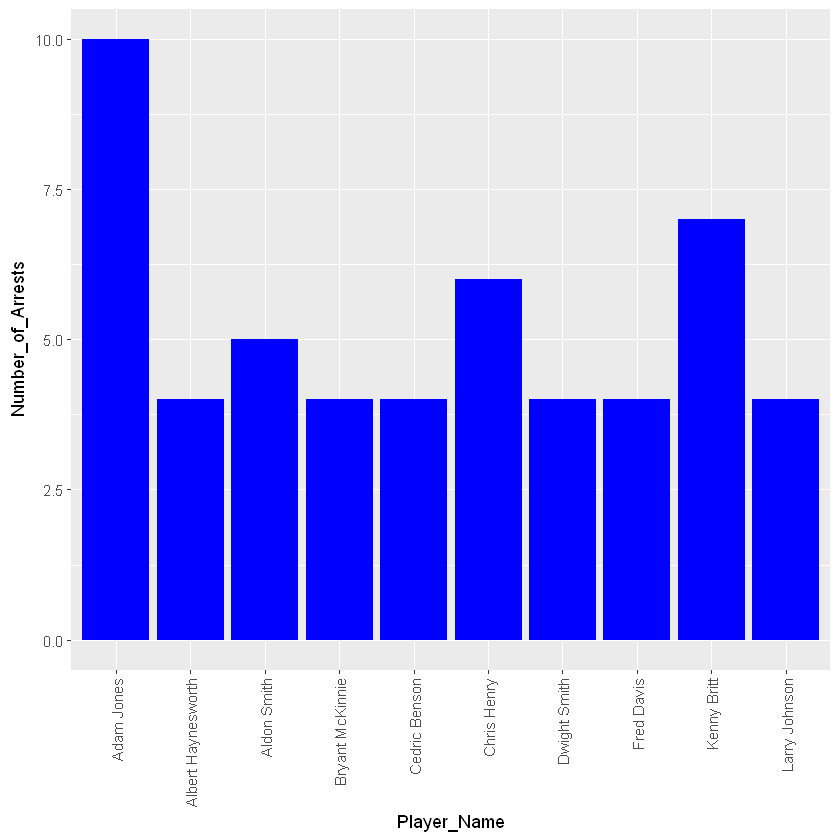

In [27]:

ArrestsbyPlayer <- as.data.frame(table(NFLArrests$NAME))
colnames(ArrestsbyPlayer) <- c("Player_Name", "Number_of_Arrests")
ArrestsbyPlayer2 = head(arrange(ArrestsbyPlayer,desc(Number_of_Arrests)), n = 10)

ggplot(ArrestsbyPlayer2, aes(x = Player_Name, Number_of_Arrests), y = Number_of_Arrests) +
  geom_bar(stat = "identity", fill = "blue") +  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=.5))


# Takeaway

 I always say it "Sign players who lead by example" and my data showed Kenny Britt is 2nd most arrested player since 1999. In the off-season Cleveland Browns signed Kenny Britt 4 year # 32 million dollar contract and now they dropped him. Can he still make an impact on some team? Possibly. Everyone deserves multiple chances. However, I would not want him setting an example for a young team.  

 I did this analysis because the media a lot of times makes it seem like the NFL is full of criminals. However, there were 23 arrests in 2016 out of 1700 players, you can see that it is less than 1,5%. It is players like Kenny Britt and Adam Jones who ruin the NFL's reputation.